# Logistic Regression Project (Heart Disease Detection)

#### **Understanding the Problem**
The dataset contains diffrent physical attributes based on tests carried out physically on patients. This done to determine if the patient has heart disease, which is represented in the target column.

Determining if a patient has heart disease can be an invasive process so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

#### **Objectives**

*   Use EDA to identify useful features and create a statistical summary
*   Come up with a logistic regression model that predicts the percentage chance a patient has heart disease.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

sns.set_style("darkgrid")

In [ ]:
data = pd.read_csv("heart.csv")

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Exploratory Data Analysis

**A bar plot that shows the total counts per target value**

In [ ]:
# Check the distribution of the target variable
target_distribution = data['target'].value_counts()
target_distribution

,count
target,
1,165
0,138


<Axes: xlabel='target', ylabel='count'>

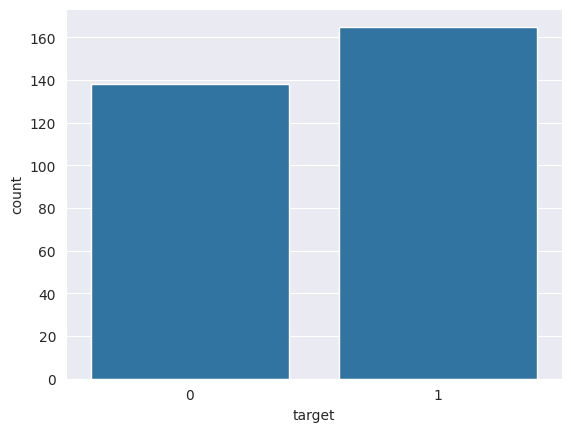

In [ ]:
sns.countplot(x="target", data=data)

### Visualizing the distribution of numerical figures

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

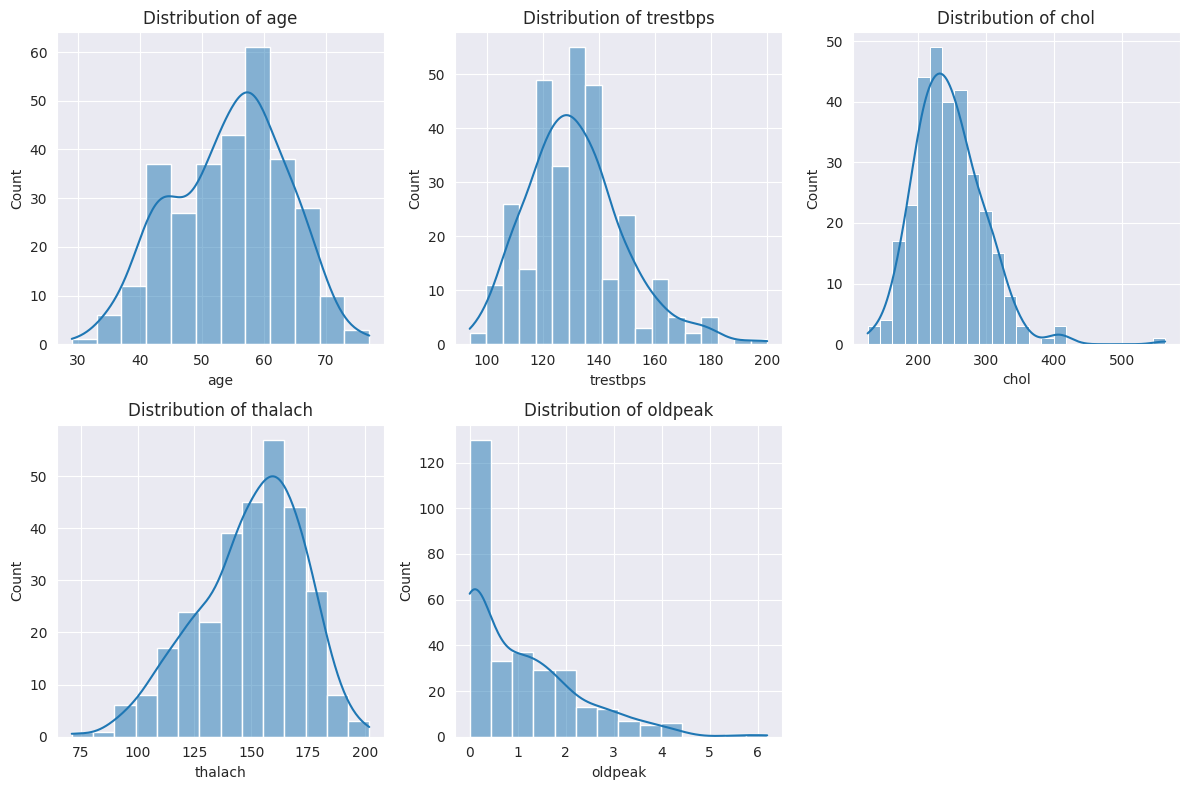

In [ ]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_columns, 1):
  plt.subplot(2, 3, i)
  sns.histplot(data[feature], kde=True)
  plt.title(f"Distribution of {feature}")
  # plt.xlabel(feature)
  # plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**A pairplot that displays the relationships between the following columns:**

 ['age','trestbps', 'chol','thalach','target']

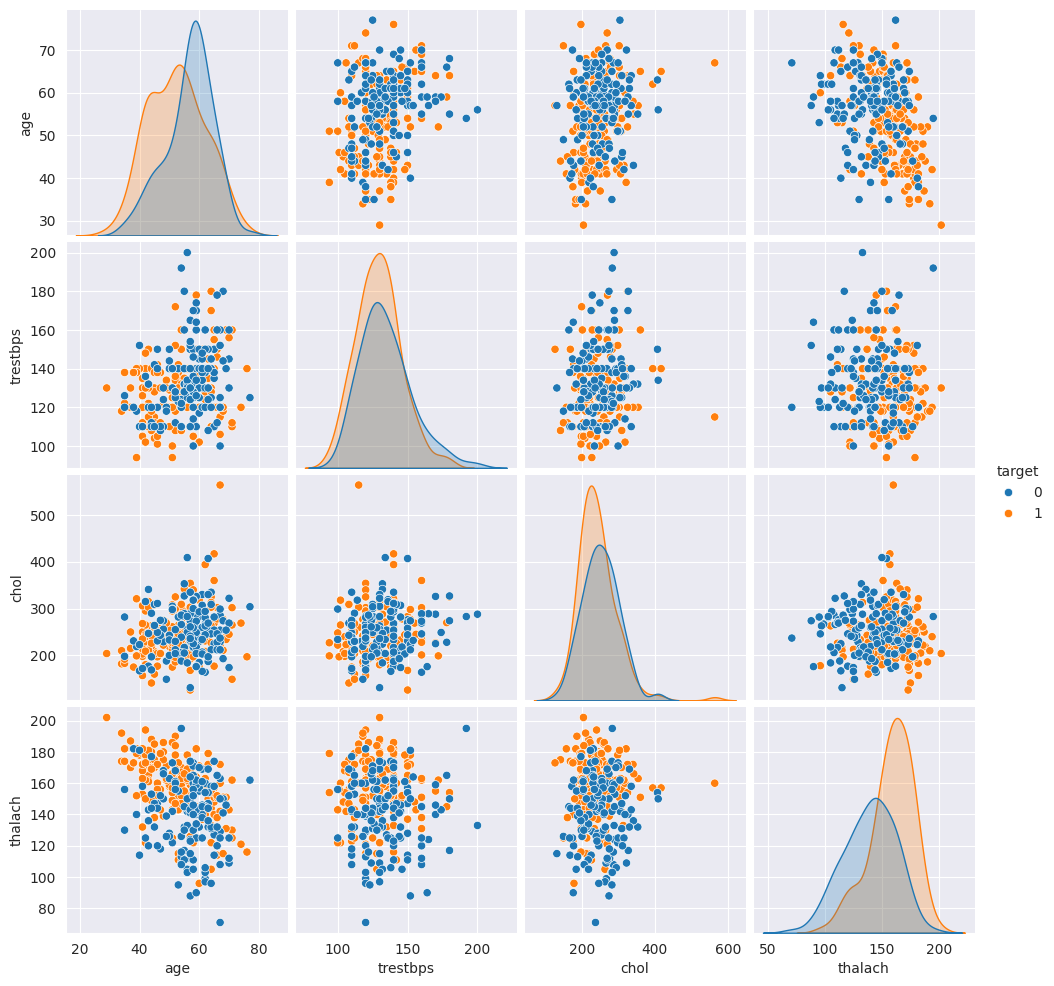

In [ ]:
sns.pairplot(data[['age','trestbps', 'chol','thalach','target']], hue="target")


**A heatmap that displays the correlation between all the variables**

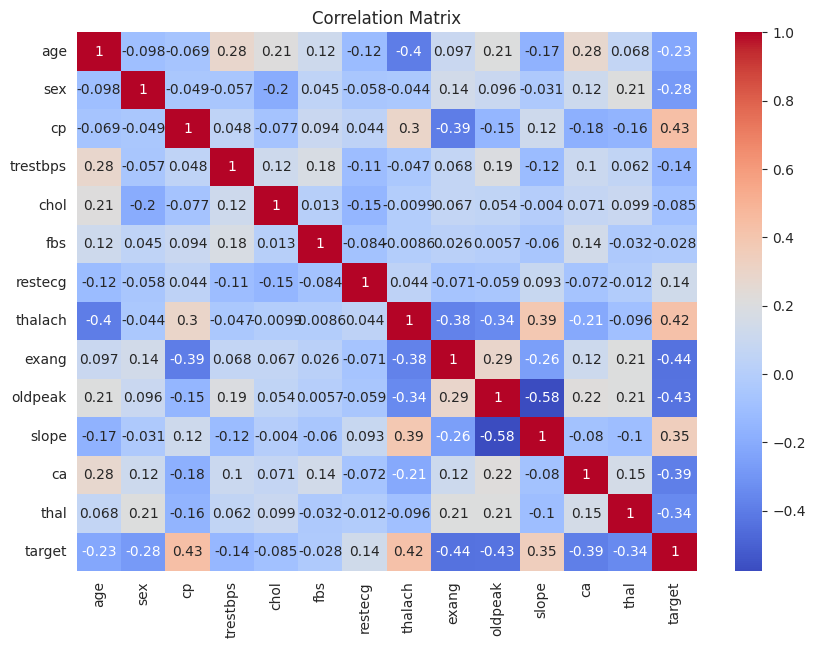

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

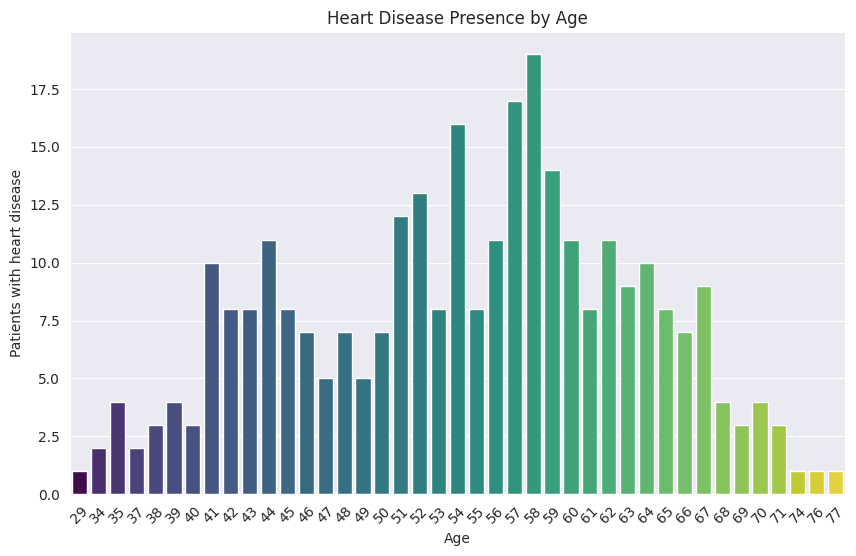

In [ ]:
# Group the data by age and calculate the mean target value for each age
age_groups = data.groupby('age')['target'].count()

# Plot the mean target value for each age
plt.figure(figsize=(10, 6))
sns.barplot(x=age_groups.index, y=age_groups.values, palette='viridis', hue=age_groups.index, legend=False)
plt.title('Heart Disease Presence by Age')
plt.xlabel('Age')
plt.ylabel('Patients with heart disease')
plt.xticks(rotation=45)
plt.show()

## Training the Model

In [ ]:
# Split the data into features (X) and target (y)
X = data.drop("target", axis=1)
y = data["target"]

Test size 20%, random state of 42

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Create Logistic Regression Models

In [ ]:
model = LogisticRegression()
log_model = LogisticRegressionCV()

In [ ]:
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
log_model.fit(X_train, y_train)

LogisticRegressionCV()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_log_pred = log_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy_log = accuracy_score(y_test, y_log_pred)
conf_matrix_log = confusion_matrix(y_test, y_log_pred)
class_report_log = classification_report(y_test, y_log_pred)
accuracy

0.8524590163934426

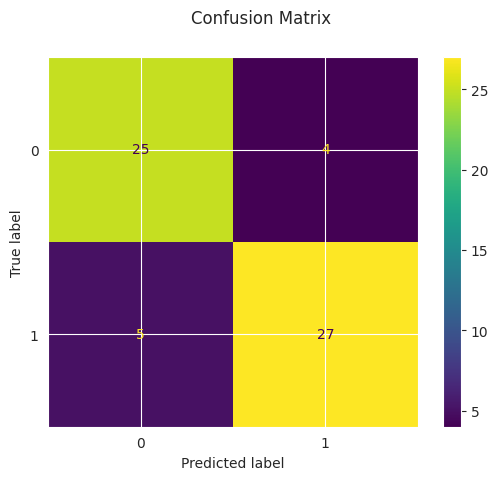

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## Trying out the Model

In [ ]:
new_patient = pd.DataFrame({
    'age': [48.0],
    'sex': [0.0],
    'cp': [2.0],
    'trestbps': [130.0],
    'chol': [275.0],
    'fbs': [0.0],
    'restecg': [1.0],
    'thalach': [139.0],
    'exang': [0.0],
    'oldpeak': [0.2],
    'slope': [2.0],
    'ca': [0.0],
    'thal': [2.0]
})

In [ ]:
new_patient

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,48.0,0.0,2.0,130.0,275.0,0.0,1.0,139.0,0.0,0.2,2.0,0.0,2.0


In [ ]:

new_patient_scaled = scaler.transform(new_patient)

# Make a prediction on the new patient
prediction = model.predict(new_patient_scaled)
probabilty = model.predict_proba(new_patient_scaled)

# print("Prediction for the new patient:", prediction)
# print("Probabilty for the new patient:", probabilty)

if prediction[0] == 1:
    print(f"{round(probabilty[0][1] * 100)}% chance the new patient has a heart disease.")
else:
    print(f"{round(probabilty[0][1] * 100)}% chance the new patient does not have a heart disease.")


98% chance the new patient has a heart disease.
